In [288]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

# Analysis Questions
<ul>
<li>Stingy Vs Greedy (Wins)
<li>Station vs Utility
<li>All 5 combat

## Stingy VS Greedy


In [289]:
df = pd.read_csv("./data_unused/GreedyStingy.csv")
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,GREEDY,2454.0,17.0,2.0,3.0,22.0
1,STINGY,1532.0,1.0,1.0,0.0,2.0
2,GREEDY,5162.0,16.0,1.0,2.0,19.0
3,GREEDY,9426.0,16.0,2.0,3.0,21.0
4,GREEDY,8567.0,11.0,2.0,3.0,16.0


In [290]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
GREEDY,3461.0,16.0,2.0,3.0,20.0
STINGY,1478.0,3.0,0.0,0.5,4.0


In [291]:
df['strategy'].value_counts(normalize=True)

GREEDY    0.600804
STINGY    0.399196
Name: strategy, dtype: float64

In [292]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['GREEDY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['STINGY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

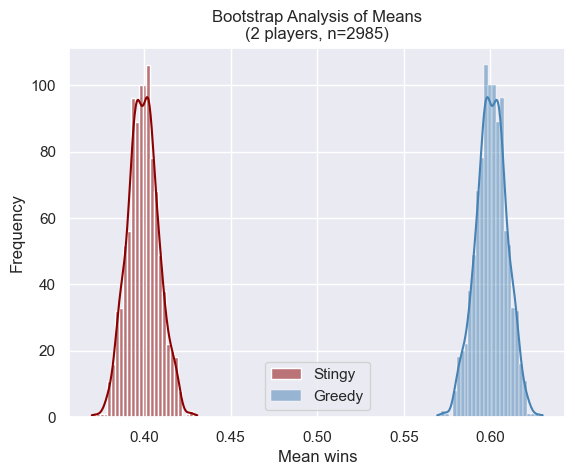

In [293]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Stingy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Greedy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

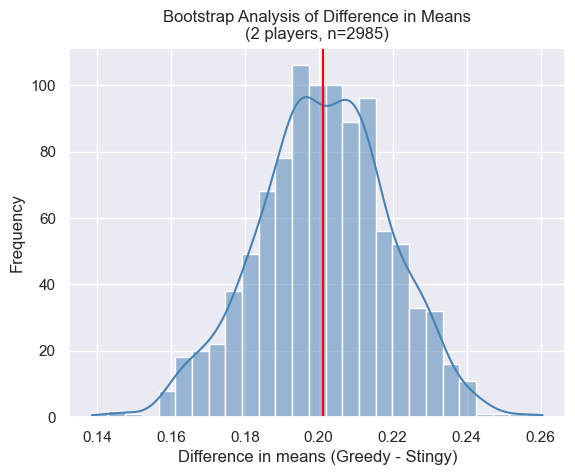

In [294]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Greedy - Stingy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')

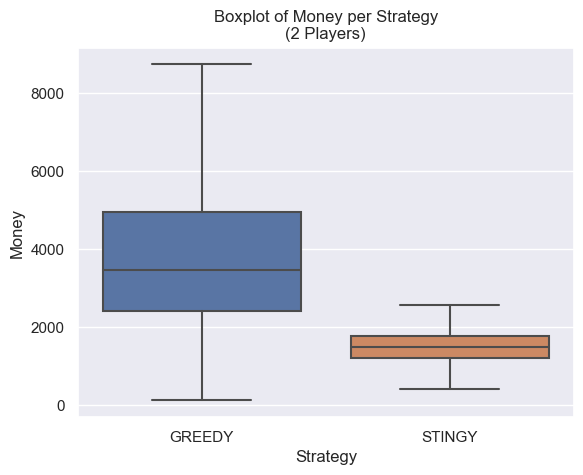

In [295]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

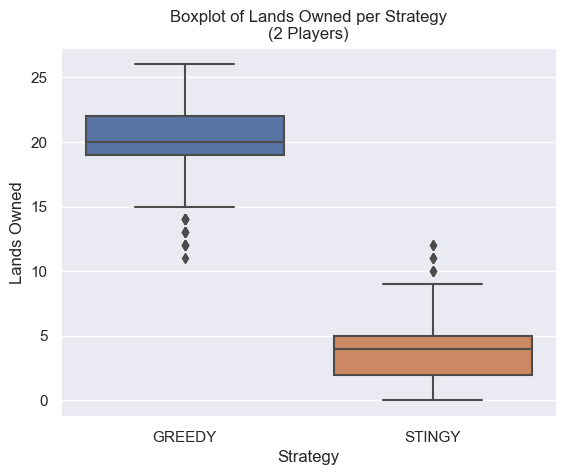

In [296]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

## Station Vs Utility

In [297]:
df = pd.read_csv("./data_unused/StationUtility.csv")
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STATION_GUY,18014.0,14.0,1.0,2.0,17.0
1,STATION_GUY,81732.0,11.0,1.0,1.0,13.0
2,UTILITY_GUY,40589.0,14.0,1.0,1.0,16.0
3,STATION_GUY,2266.0,9.0,0.0,3.0,12.0
5,STATION_GUY,34662.0,11.0,0.0,2.0,13.0


In [298]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
STATION_GUY,5077.0,11.0,1.0,3.0,14.0
UTILITY_GUY,9482.5,11.0,1.0,1.0,14.0


In [299]:
df['strategy'].value_counts(normalize=True)

STATION_GUY    0.605645
UTILITY_GUY    0.394355
Name: strategy, dtype: float64

In [300]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['STATION_GUY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['UTILITY_GUY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

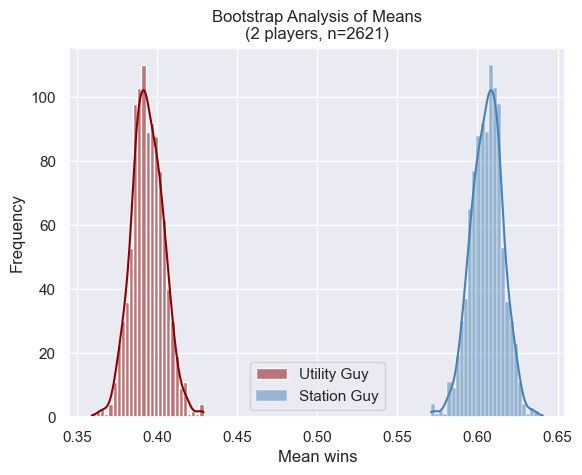

In [301]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Utility Guy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Station Guy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

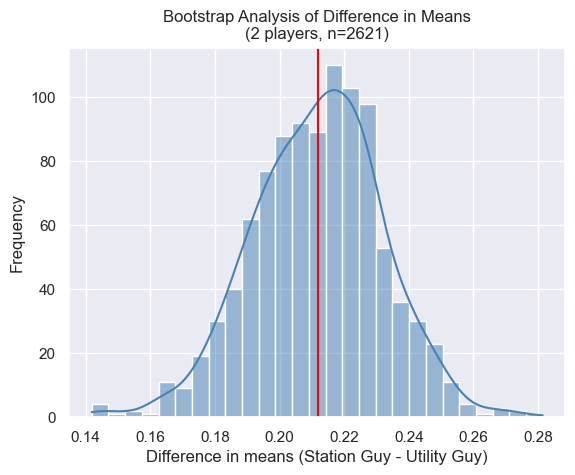

In [302]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Station Guy - Utility Guy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')

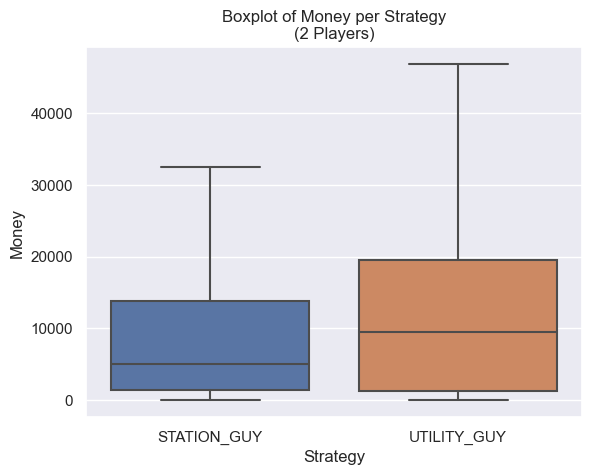

In [303]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same amount of money. However, The spread of Utility Guy is larger.

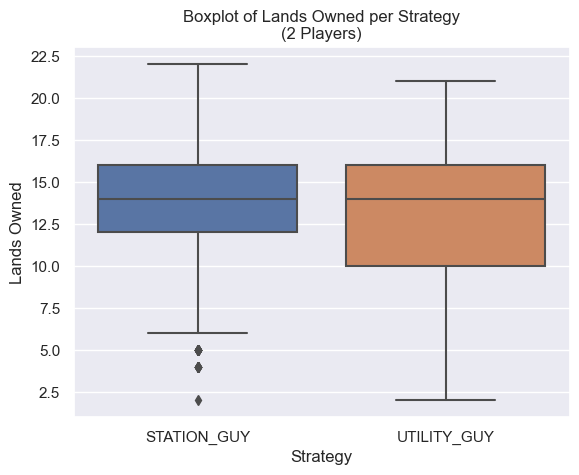

In [304]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same number of lands owned. However, The spread of Utility Guy is larger.

## All!

In [305]:
df = pd.read_csv('./data_unused/AllStrategies.csv')
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,DEFAULT,72809.0,9.0,0.0,0.0,9.0
1,GREEDY,18413.0,7.0,1.0,3.0,11.0
4,DEFAULT,75125.0,6.0,1.0,0.0,7.0
6,GREEDY,15994.0,9.0,0.0,0.0,9.0
12,STINGY,30840.0,5.0,0.0,0.0,5.0


In [306]:
df.groupby("strategy").median()

,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
DEFAULT,45044.5,6.0,0.0,1.0,7.0
GREEDY,22964.5,9.0,0.0,1.0,10.0
STATION_GUY,41460.5,5.0,0.0,2.0,7.0
STINGY,66753.0,5.0,0.0,0.0,5.0
UTILITY_GUY,40901.0,5.0,0.0,0.0,7.0


In [307]:
df['strategy'].value_counts(normalize=True)


GREEDY         0.575213
DEFAULT        0.191107
STATION_GUY    0.134342
UTILITY_GUY    0.090823
STINGY         0.008515
Name: strategy, dtype: float64

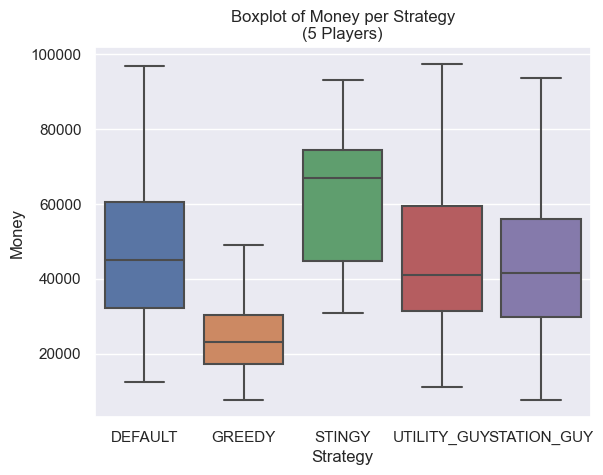

In [308]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

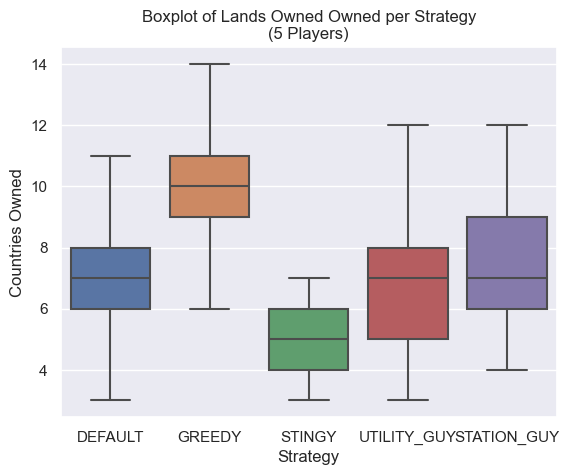

In [309]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df, showfliers=False)
plt.title('Boxplot of Lands Owned Owned per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Countries Owned')
plt.show();

## Does monopoly game tend to go to infinity 12% of the time?

In [310]:
df = pd.read_csv('./data_unused/DefaultDefault.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,DEFAULT,13588.0,13.0,1.0,3.0,17.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,DEFAULT,6617.0,11.0,2.0,3.0,16.0
3,DEFAULT,1324.0,11.0,0.0,2.0,13.0
4,DEFAULT,1335.0,5.0,1.0,2.0,8.0


In [ ]:
df.shape 

(3000, 6)

In [312]:
non_ending = df.isna().sum()[0]

In [313]:
## sample proportion is 12% ?

In [314]:
boots = []
for _ in range(1000):
    boot = df.sample(df.shape[0], replace=True)
    p_hat = boot.isna().sum()[0]/boot.shape[0]
    boots.append(p_hat)


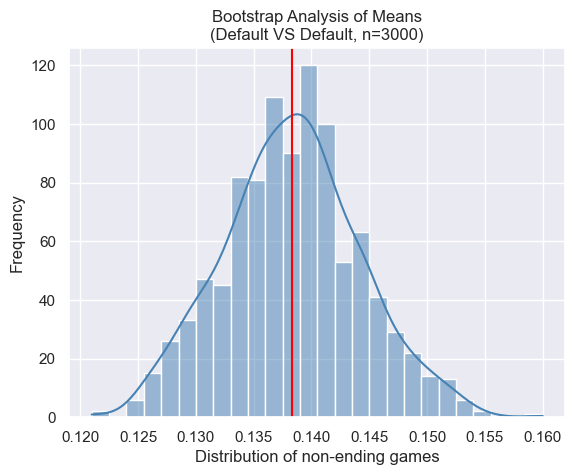

In [315]:
sns.histplot(boots, color='steelBlue', kde=True)
plt.xlabel("Distribution of non-ending games")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(Default VS Default, n={df.shape[0]})")
plt.axvline(np.mean(boots), color='red');